# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [119]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [120]:
import numpy as np

def design_matrix(x, m):
    n = len(x)
    D = np.zeros((n, m+1)) 
    for i in range(n):
        for j in range(m+1):
            D[i][j] = x[i]**j
    return D
    

In [121]:
x_test = [1,2,3,4]
D = design_matrix(x_test, 3)
D

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [122]:
D = design_matrix(x, 3)
A = D.T @ D
b = D.T @ y
beta = np.linalg.solve(A, b)
beta

array([ 0.49483598, -0.26983377, -2.01973166,  1.01540301])

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [123]:
n = len(x)
for m in range(1, n): 
    D = design_matrix(x, m)
    summ = 0
    for k in range(n):
        A = D.T @ D
        b = D.T @ y
        beta = np.linalg.solve(A, b)
        Pm_xk = D[k] @ beta #k-th row of design matrix times vector of coefficients == P_m(x_k)
        summ += (Pm_xk - y[k])**2
    disp_m = (1/(n-m)) * summ 
    print("Dispersion on m = " + str(m) + ": " + str(disp_m))

Dispersion on m = 1: 4.450215866706205
Dispersion on m = 2: 2.4534269975791783
Dispersion on m = 3: 0.01247089909973165
Dispersion on m = 4: 0.012460407583510042
Dispersion on m = 5: 0.012600059280330578
Dispersion on m = 6: 0.011590813700606611
Dispersion on m = 7: 0.012289041756436829
Dispersion on m = 8: 0.01156937152473263
Dispersion on m = 9: 0.012931045181871444
Dispersion on m = 10: 0.014257919592393146
Dispersion on m = 11: 0.005379407710001037
Dispersion on m = 12: 0.007129050690130868
Dispersion on m = 13: 0.01004848402645803
Dispersion on m = 14: 0.02000394654981088


It seems that dispersion stabilizes at ~0.012, but then it falls to 0.005 and after that rises again. I will take $ \sigma_m^2 = 0.005$  and  $m = 11.$


In [124]:
nArr2D = np.array(([21, 22, 23], [11, 22, 33], [43, 77, 89]))
nArr2D[0]


array([21, 22, 23])

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

We need to take different to get visually different plots. Let's take m = 2, m = 11 and m = 14

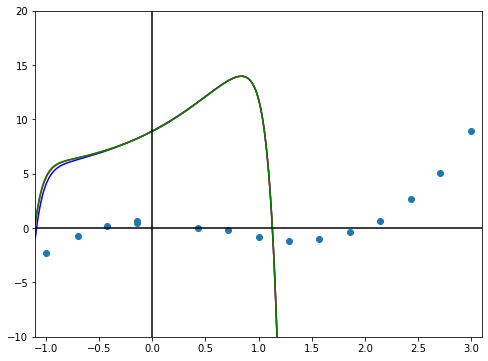

In [125]:
import matplotlib.pyplot as plt

ams = [3, 12, 14]
polynomials = []
n = len(x)
for m in ams: 
    D = design_matrix(x, m)
    A = D.T @ D
    b = D.T @ y
    beta = np.linalg.solve(A, b)
    P_m = D @ beta #design matrix times vector of coefficients == vector of values of P_m(x)
    p = np.poly1d(P_m)
    polynomials.append(p)

pol8 = polynomials[0]
pol11 = polynomials[1]
pol13 = polynomials[2]

x_s = np.arange(-1.1, 3.1, 0.01)
p8_vals = [pol8(xi) for xi in x_s]
p11_vals = [pol11(xi) for xi in x_s]
p13_vals = [pol13(xi) for xi in x_s]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_s, p8_vals , color = 'blue')
ax.plot(x_s, p11_vals, color = 'red')
ax.plot(x_s, p13_vals, color = 'green')
ax.scatter(x, y)
plt.ylim(-10, 20)  
plt.xlim(-1.1, 3.1)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

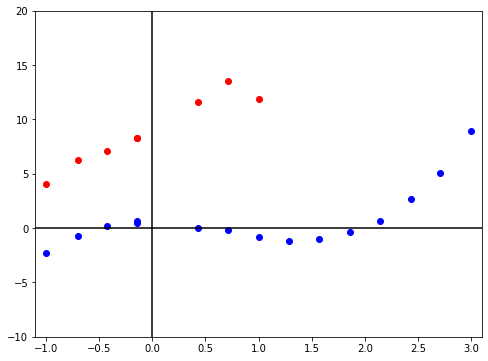

In [126]:
ld = [polynomials[0](xk) for xk in x]
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x, ld, color = 'red')
ax.scatter(x,y , color = 'blue')
plt.ylim(-10, 20)  
plt.xlim(-1.1, 3.1)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...